<a href="https://colab.research.google.com/github/nandanak77/coco_care/blob/main/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

zip_path = "/content/drive/MyDrive/CoconutDisease.v1i.yolov8.zip"

if os.path.exists(zip_path):
    print("ZIP file found:", zip_path)
else:
    print("ZIP file NOT found. Check the path!")

ZIP file found: /content/drive/MyDrive/CoconutDisease.v1i.yolov8.zip


In [ ]:
!cp "/content/drive/MyDrive/CoconutDisease.v1i.yolov8.zip" "/content/"

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/CoconutDisease.v1i.yolov8.zip"
extract_path = "/content/CoconutDisease.v1i.yolov8"

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
ls 'CoconutDisease.v1i.yolov8.zip'

CoconutDisease.v1i.yolov8.zip


In [ ]:
# Install YOLOv8 (Ultralytics)
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.1/949.1 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Import necessary libraries
import os
from ultralytics import YOLO
import cv2
import numpy as np
import torch



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
zip_path = "/content/drive/MyDrive/CoconutDisease.v1i.yolov8.zip"  # Path to dataset in Google Drive

dataset_path = "/content/drive/MyDrive/CoconutDisease.v1i.yolov8"  # Extracted dataset location
results_path = "/content/drive/MyDrive/coconutdisease_yolov8_results"  # Save results in Drive
trained_model_path = f"{results_path}/coconutdiseaseyolov8_coconut_model.pt"

In [ ]:
# Ensure the results directory exists
if not os.path.exists(results_path):
    os.makedirs(results_path)

In [ ]:
os.makedirs(results_path, exist_ok=True)

In [ ]:
import os

zip_path = "/content/drive/MyDrive/CoconutDisease.v1i.yolov8.zip"
print("File exists:", os.path.exists(zip_path))


File exists: True


In [ ]:
print("Extracted files:", os.listdir(dataset_path))

Extracted files: ['train', 'test', 'valid', 'README.dataset.txt', 'README.roboflow.txt', 'data.yaml']


In [ ]:
import os

yaml_path = "/content/drive/MyDrive/CoconutDisease.v1i.yolov8/data.yaml"
print("File exists:", os.path.exists(yaml_path))


File exists: True


In [ ]:
# Define dataset YAML content
data_yaml_content = f"""
path: {dataset_path}  # Root directory of dataset
train: train/images  # Path to training images
val: valid/images  # Path to validation images
test: test/images  # Path to test images

nc: 5  # Number of classes (update if needed)
names: ["bud_root_drooping", "bud_rot", "grey_leaf_spot", "leaf_rot","stem_bleeding"]  # Update class names
"""


In [ ]:
# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # You can use 'yolov8s.pt' for a larger model


100%|██████████| 6.25M/6.25M [00:00<00:00, 188MB/s]


In [ ]:
results = model.train(
    data=yaml_path,  # Path to dataset config file
    epochs=45,  # Increased from 25 to 40
    batch=32,  # Adjusted based on GPU memory
    imgsz=800,  # Increased for better feature extraction
    device='cuda',  # Use GPU if available, otherwise CPU
    project=results_path,  # Save results in Drive
    name="yolov8_coconut_training4"
)
# Reload the trained model
best_model_path = f"{results_path}/yolov8_coconut_training4/weights/best.pt"
model = YOLO(best_model_path)

# Test YOLOv8 model on the test set
test_results = model.val(
    data=f"{dataset_path}/data.yaml",
    split="test"
)
# Get accuracy
mAP50 = test_results.box.map50
mAP50_95 = test_results.box.map  # Mean Average Precision for IoU [0.5:0.95]
print(f"Test mAP@50: {mAP50:.4f}")
print(f"Test mAP@50-95: {mAP50_95:.4f}")


Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/CoconutDisease.v1i.yolov8/data.yaml, epochs=45, time=None, patience=100, batch=32, imgsz=800, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/coconutdisease_yolov8_results, name=yolov8_coconut_training4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fa

100%|██████████| 755k/755k [00:00<00:00, 38.3MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 171MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/CoconutDisease.v1i.yolov8/train/labels.cache... 2657 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2658/2658 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoconutDisease.v1i.yolov8/train/images/BudRot136_jpg.rf.d2c2e930df306007df413b71cc2c714b.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/CoconutDisease.v1i.yolov8/train/images/BudRot136_jpg.rf.d2c2e930df306007df413b71cc2c714b.jpg'
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2553, len(boxes) = 4328. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/CoconutDisease.v1i.yolov8/valid/labels.cache... 343 images, 0 backgrounds, 0 corrupt: 100%|██████████| 343/343 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 296, len(boxes) = 513. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      6.01G      1.692      3.609      2.045          1        800: 100%|██████████| 84/84 [12:05<00:00,  8.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]

                   all        343        513      0.435      0.171      0.151     0.0492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45      7.43G      1.634      2.778      1.948          4        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


                   all        343        513      0.574      0.181      0.173     0.0602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      7.43G       1.61      2.475      1.915          3        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]


                   all        343        513      0.219      0.198      0.144     0.0515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45      7.43G      1.627      2.345      1.927          3        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]


                   all        343        513      0.163      0.139     0.0846     0.0262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45      7.43G       1.58      2.135      1.892          6        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.30s/it]


                   all        343        513      0.293      0.318      0.228     0.0891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45      7.43G      1.589      2.027       1.87          2        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.19s/it]

                   all        343        513      0.528      0.365      0.374      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      7.43G      1.506      1.896      1.805          1        800: 100%|██████████| 84/84 [01:26<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        343        513      0.547      0.505      0.487      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45      7.43G      1.495      1.794      1.805          1        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        343        513      0.619      0.466      0.518      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      7.43G      1.456      1.732       1.76          2        800: 100%|██████████| 84/84 [01:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.11s/it]

                   all        343        513      0.618      0.522      0.533      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45      7.43G      1.434       1.63      1.743          2        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        343        513      0.679      0.579      0.626      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      7.43G      1.417      1.613      1.716          1        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        343        513      0.628      0.555      0.575      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45      7.43G      1.392      1.547      1.697          6        800: 100%|██████████| 84/84 [01:26<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

                   all        343        513      0.706      0.567      0.612      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45      7.43G      1.348      1.476      1.649          7        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        343        513      0.634      0.607      0.639      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      7.43G      1.329      1.423       1.63          5        800: 100%|██████████| 84/84 [01:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        343        513      0.722      0.546      0.622      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      7.43G       1.33      1.421      1.634          5        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        343        513      0.693      0.576      0.594      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45      7.43G      1.315      1.344      1.618          3        800: 100%|██████████| 84/84 [01:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.14s/it]

                   all        343        513      0.794      0.615      0.688      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45      7.43G      1.255      1.286      1.576          6        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        343        513      0.653      0.585      0.589      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45      7.43G      1.249      1.298      1.572          2        800: 100%|██████████| 84/84 [01:27<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        343        513      0.702      0.613      0.636      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45      7.43G      1.211       1.21      1.541          7        800: 100%|██████████| 84/84 [01:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.21s/it]

                   all        343        513      0.723      0.634      0.665      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45      7.43G      1.241      1.219      1.547          2        800: 100%|██████████| 84/84 [01:24<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        343        513      0.789      0.654      0.686      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45      7.43G        1.2      1.167       1.52          4        800: 100%|██████████| 84/84 [01:25<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        343        513      0.725      0.693      0.696      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      7.43G      1.167      1.132      1.496          4        800: 100%|██████████| 84/84 [01:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        343        513      0.761      0.633      0.687      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      7.43G      1.161      1.126      1.505          1        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        343        513      0.782      0.673      0.718      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45      7.43G      1.138      1.106      1.478          1        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

                   all        343        513      0.732      0.693      0.697      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45      7.43G      1.129      1.115      1.477          1        800: 100%|██████████| 84/84 [01:26<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.16s/it]

                   all        343        513      0.705       0.69      0.693      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      7.43G      1.107      1.036       1.44          3        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

                   all        343        513      0.785      0.658      0.721      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      7.43G      1.077      0.994      1.417          3        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        343        513      0.731      0.711      0.709      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45      7.43G      1.071     0.9904      1.422          3        800: 100%|██████████| 84/84 [01:26<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.10s/it]

                   all        343        513      0.821      0.662      0.718      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      7.43G      1.044     0.9527        1.4          5        800: 100%|██████████| 84/84 [01:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.10s/it]

                   all        343        513      0.793      0.685      0.719      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45      7.43G      1.064     0.9612      1.408          3        800: 100%|██████████| 84/84 [01:28<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]

                   all        343        513      0.762      0.704      0.716      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45      7.43G      1.038     0.9289      1.398          2        800: 100%|██████████| 84/84 [01:28<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        343        513      0.777      0.724      0.736      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45      7.43G      1.011     0.9111      1.375          5        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        343        513      0.766      0.709      0.734      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45      7.43G      0.998     0.8982       1.37          2        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]

                   all        343        513      0.782      0.718      0.731      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      7.43G       0.99     0.8554      1.353          2        800: 100%|██████████| 84/84 [01:26<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        343        513      0.728      0.728      0.734      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      7.43G      0.966     0.8549      1.336          3        800: 100%|██████████| 84/84 [01:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.09s/it]

                   all        343        513      0.803      0.725      0.752      0.452


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45      7.43G      1.045     0.8719      1.463          2        800: 100%|██████████| 84/84 [01:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        343        513       0.81      0.709      0.746      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45      7.43G     0.9814     0.7479      1.421          4        800: 100%|██████████| 84/84 [01:21<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

                   all        343        513      0.786      0.728      0.751      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      7.43G     0.9544     0.7235      1.392          2        800: 100%|██████████| 84/84 [01:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        343        513      0.774       0.73      0.732      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      7.43G     0.9455      0.705      1.397          1        800: 100%|██████████| 84/84 [01:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        343        513      0.831      0.707      0.748      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45      7.43G     0.9098     0.6845      1.363          2        800: 100%|██████████| 84/84 [01:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.09s/it]

                   all        343        513      0.817      0.718      0.756      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45      7.43G     0.8844     0.6428       1.32          1        800: 100%|██████████| 84/84 [01:23<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        343        513      0.814      0.729      0.751       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      7.43G     0.8758      0.688      1.338          1        800: 100%|██████████| 84/84 [01:22<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        343        513      0.832      0.728      0.746      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45      7.43G     0.8523     0.6132      1.293          1        800: 100%|██████████| 84/84 [01:24<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        343        513        0.8      0.729       0.74      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45      7.43G     0.8137     0.6005      1.282          1        800: 100%|██████████| 84/84 [01:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.11s/it]

                   all        343        513      0.827      0.728      0.761      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      7.43G     0.8042     0.6273      1.277          2        800: 100%|██████████| 84/84 [01:24<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

                   all        343        513      0.824       0.73      0.757       0.47



45 epochs completed in 1.345 hours.
Optimizer stripped from /content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/weights/best.pt...
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.44s/it]


                   all        343        513       0.83      0.727      0.756      0.469
     bud root dropping         62         68      0.928      0.912       0.93      0.786
               bud rot         78         90      0.975      0.876      0.935      0.554
        gray leaf spot         67        146      0.671      0.488       0.48      0.243
              leaf rot         72        119      0.841      0.714      0.787      0.447
          stembleeding         65         90      0.735      0.644      0.649      0.316
Speed: 0.4ms preprocess, 4.1ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to /content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/CoconutDisease.v1i.yolov8/test/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 155, len(boxes) = 409. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:22<00:00,  1.52s/it]


                   all        228        409      0.762      0.705      0.709      0.441
     bud root dropping         49         55      0.926      0.904      0.918      0.772
               bud rot         44         53        0.9      0.845      0.887      0.577
        gray leaf spot         49        115      0.678      0.652      0.624      0.309
              leaf rot         14         25      0.667       0.56      0.576      0.339
          stembleeding         73        161      0.642      0.565      0.539       0.21
Speed: 1.0ms preprocess, 7.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
Test mAP@50: 0.7088
Test mAP@50-95: 0.4413


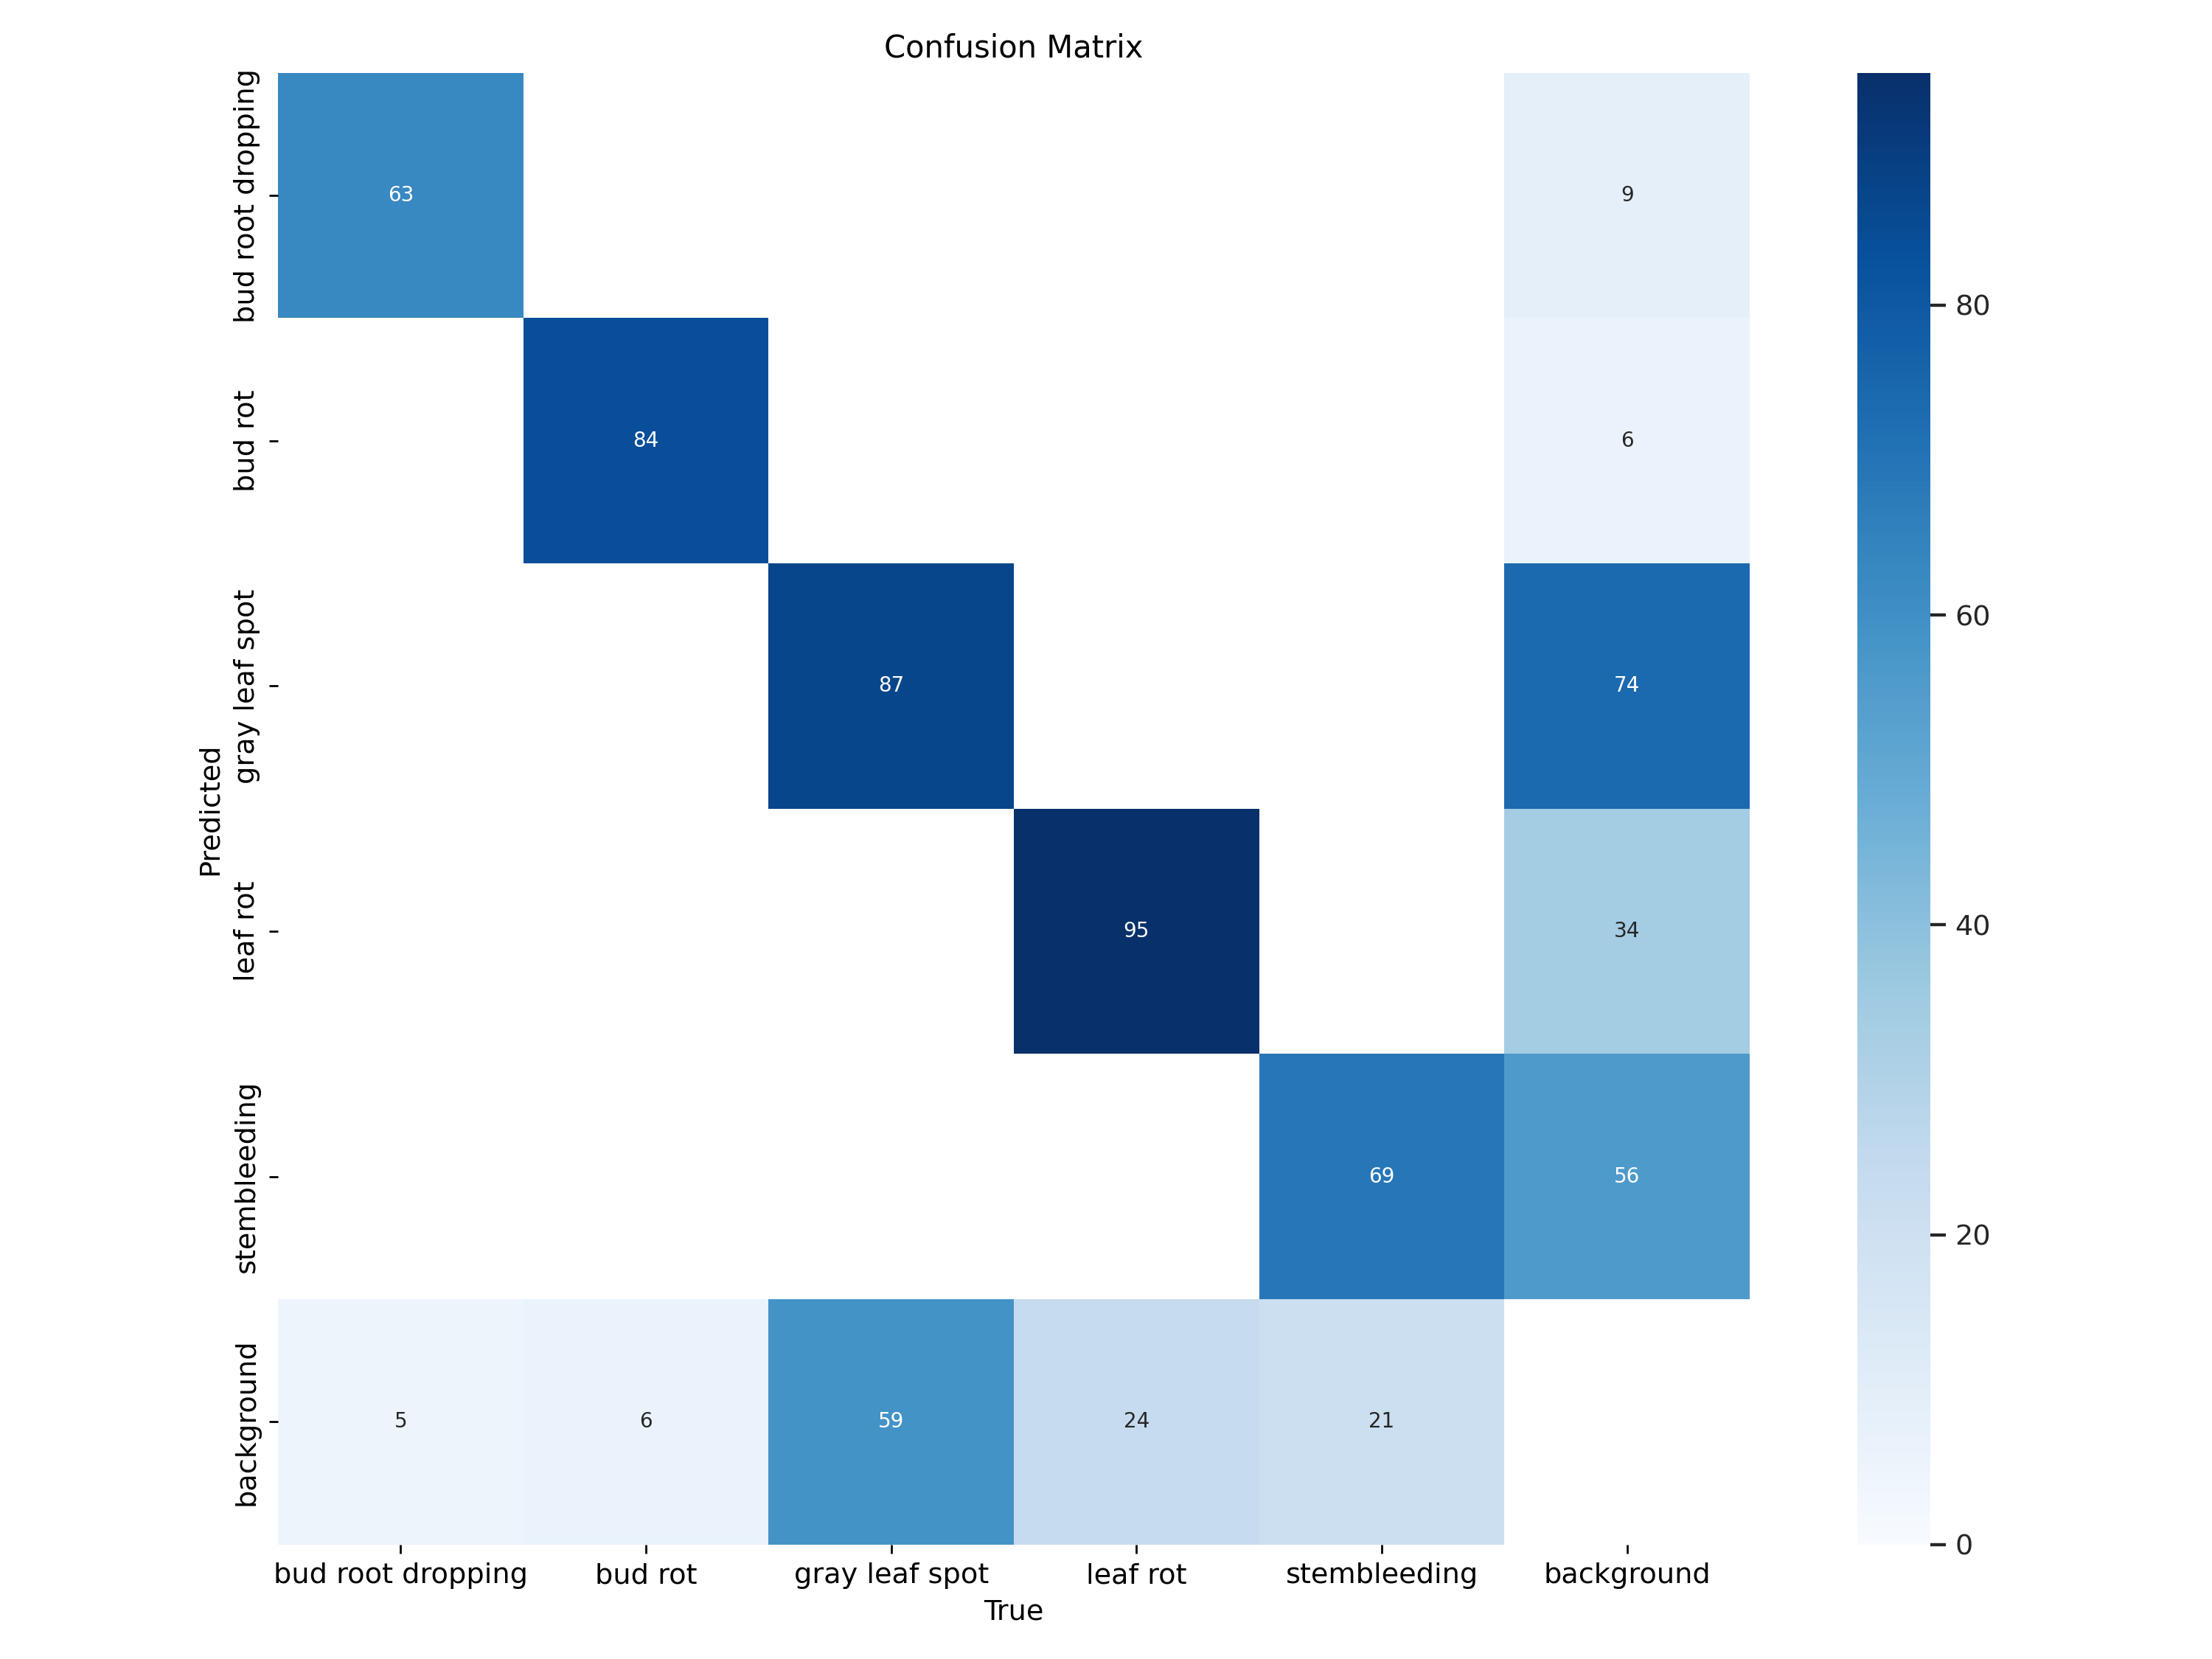

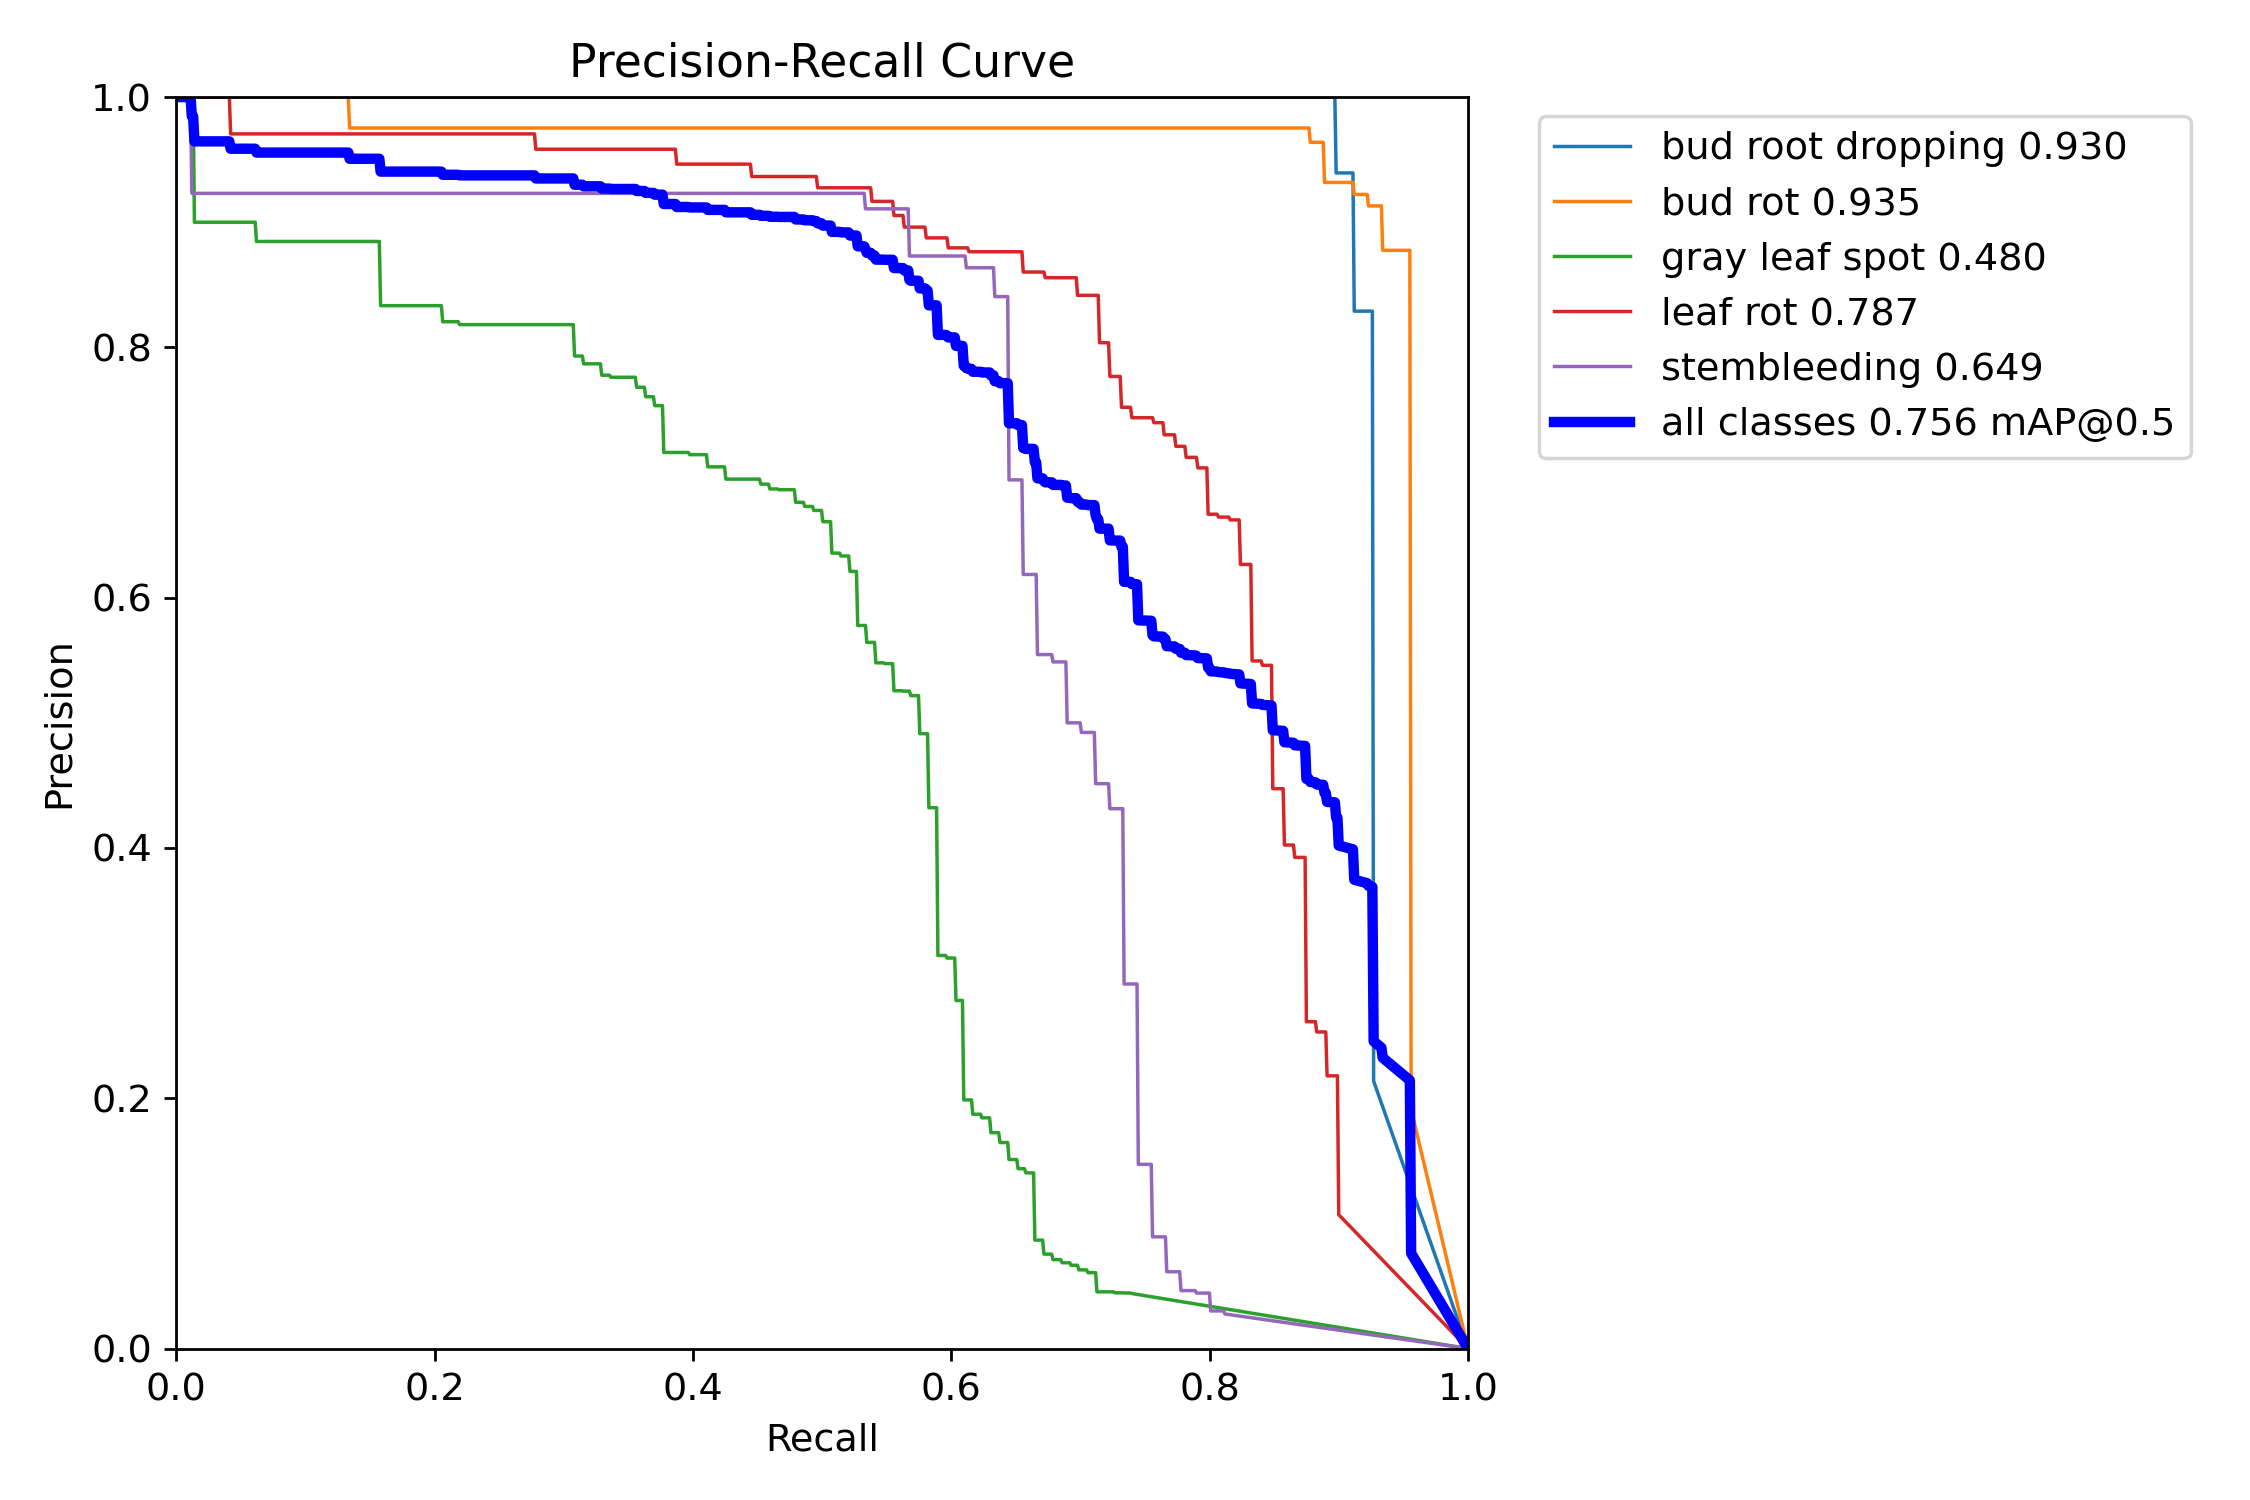

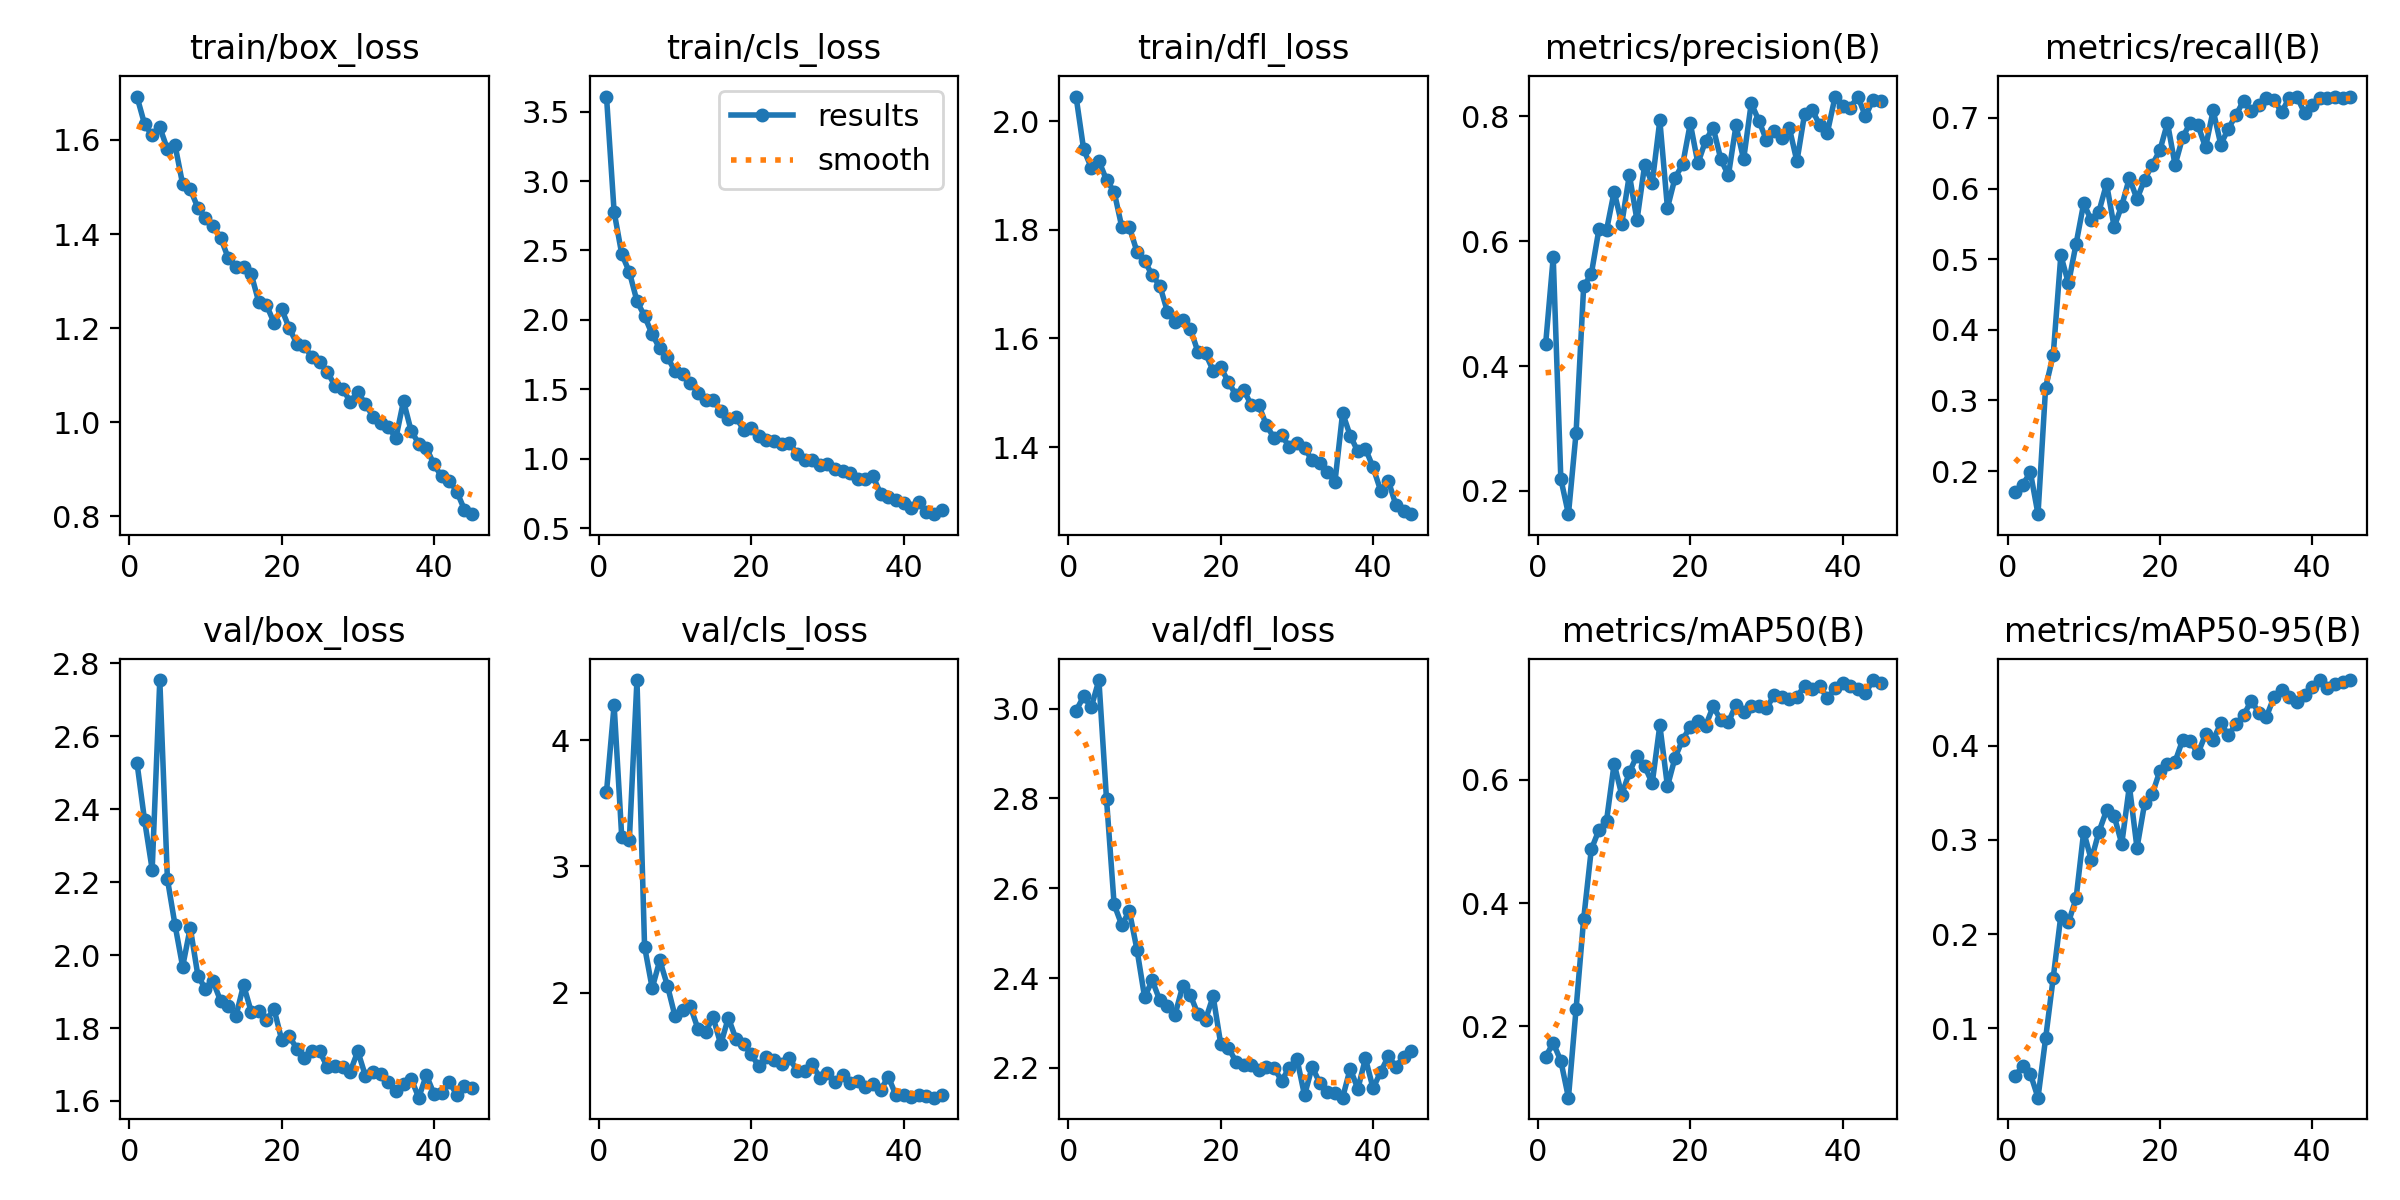

In [ ]:
import matplotlib.pyplot as plt
import cv2
from IPython.display import display
from PIL import Image

# Load and display Confusion Matrix
conf_matrix_path = "/content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/confusion_matrix.png"
conf_img = Image.open(conf_matrix_path)
display(conf_img)

# Load and display Precision-Recall Curve
pr_curve_path = "/content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/PR_curve.png"
pr_img = Image.open(pr_curve_path)
display(pr_img)

# Load and display Results.png (which contains loss curves)
results_img_path = "/content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/results.png"
results_img = Image.open(results_img_path)
display(results_img)



image 1/1 /content/drive/MyDrive/image4.png: 640x800 1 bud root dropping, 9.0ms
Speed: 4.0ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 800)


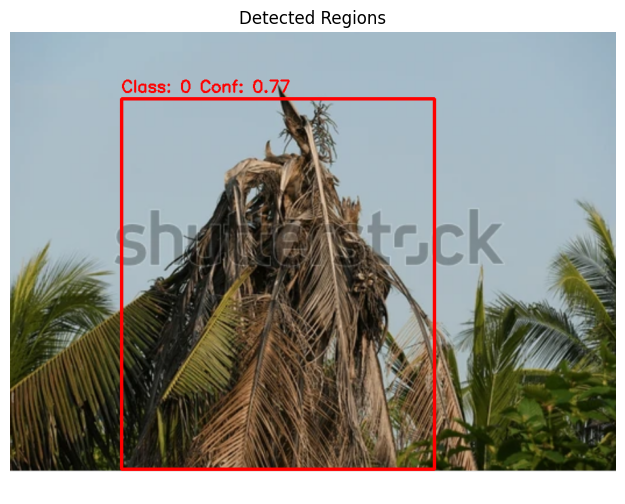

In [ ]:
from ultralytics import YOLO

model_path = "/content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/weights/best.pt"
model = YOLO(model_path)  # Load model
image_path="/content/drive/MyDrive/image4.png"
results = model("/content/drive/MyDrive/image4.png", conf=0.02)
#results.show()
# Load the image
image3 = cv2.imread(image_path)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib

# Extract detected bounding boxes
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        cls = int(box.cls[0].item())  # Class ID

        # Draw bounding box
        cv2.rectangle(image3, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Blue box
        cv2.putText(image3, f"Class: {cls} Conf: {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)  # Label

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image3)
plt.axis("off")
plt.title("Detected Regions")
plt.show()


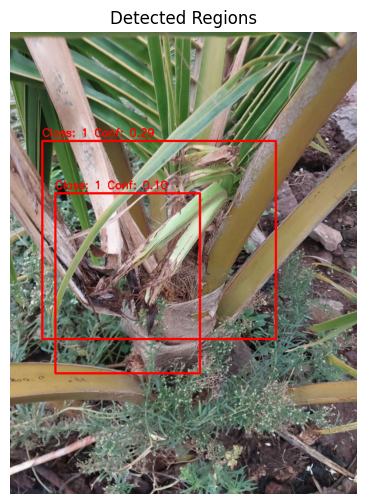

In [ ]:
# Load the image
image3 = cv2.imread(image_path)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib

# Extract detected bounding boxes
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        cls = int(box.cls[0].item())  # Class ID

        # Draw bounding box
        cv2.rectangle(image3, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Blue box
        cv2.putText(image3, f"Class: {cls} Conf: {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)  # Label

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image3)
plt.axis("off")
plt.title("Detected Regions")
plt.show()

In [ ]:
results = model("/content/drive/MyDrive/image1.png", conf=0.02)  # Increase resolution
results.show()


image 1/1 /content/drive/MyDrive/image1.png: 544x800 1 bud rot, 1 gray leaf spot, 243.2ms
Speed: 7.3ms preprocess, 243.2ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 800)


AttributeError: 'list' object has no attribute 'show'

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model_path = "/content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/weights/best.pt"
model = YOLO(model_path)

# Run inference on an image
image_path = "/content/drive/MyDrive/image7.png"
results = model(image_path, conf=0.05)  # Increase resolutio

FileNotFoundError: /content/drive/MyDrive/image7.png does not exist

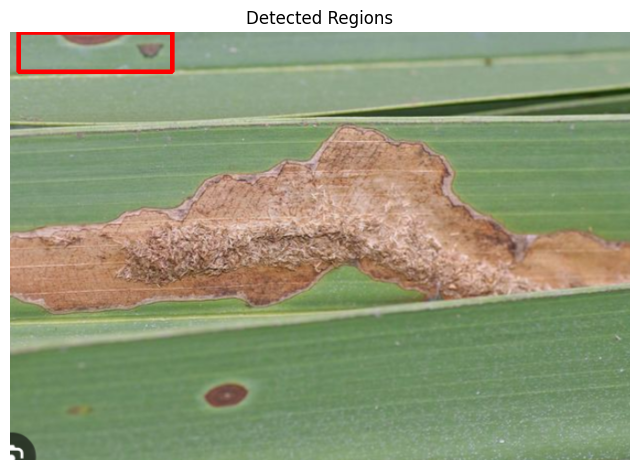

In [ ]:
# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib

# Extract detected bounding boxes
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        cls = int(box.cls[0].item())  # Class ID

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Blue box
        cv2.putText(image, f"Class: {cls} Conf: {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)  # Label

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Detected Regions")
plt.show()


In [ ]:
from ultralytics import YOLO

model_path = "/content/drive/MyDrive/coconutdisease_yolov8_results/yolov8_coconut_training4/weights/best.pt"
model = YOLO(model_path)  # Load model
image_path="/content/drive/MyDrive/image5.png"
results = model("/content/drive/MyDrive/image5.png", conf=0.02)
#results.show()



image 1/1 /content/drive/MyDrive/image5.png: 512x800 1 gray leaf spot, 37.9ms
Speed: 16.6ms preprocess, 37.9ms inference, 356.6ms postprocess per image at shape (1, 3, 512, 800)


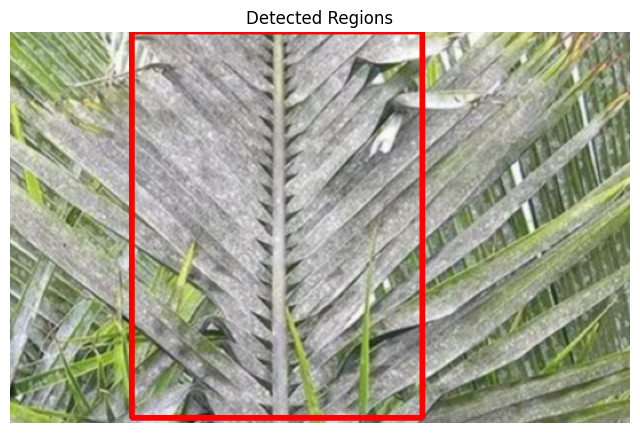

In [ ]:
import matplotlib.pyplot as plt
# Load the image
image5 = cv2.imread(image_path)
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib

# Extract detected bounding boxes
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        cls = int(box.cls[0].item())  # Class ID

        # Draw bounding box
        cv2.rectangle(image5, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Blue box
        cv2.putText(image5, f"Class: {cls} Conf: {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)  # Label

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image5)
plt.axis("off")
plt.title("Detected Regions")
plt.show()